In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

In [188]:
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [189]:
!pip install nsepy
import pandas as pd
import nsepy
from datetime import date , timedelta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
df = pd.read_csv('/content/top100companies.csv')

In [191]:
result=nsepy.get_history(symbol='BSE',start=date(2021,8,1),end=date(2022,6,25))
COL = result.columns.tolist()
COL.remove("VWAP")
result=result.drop(set(COL), axis='columns')
result.rename(columns = {'VWAP': 'Sensex'}, inplace = True)
result.info()
result.head()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 2021-08-02 to 2022-06-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sensex  224 non-null    float64
dtypes: float64(1)
memory usage: 3.5+ KB


,Sensex
Date,
2021-08-02,1275.59
2021-08-03,1269.54
2021-08-04,1255.89
2021-08-05,1226.29
2021-08-06,1226.00


In [192]:
result['Sensex'][2]

1255.89

In [193]:
result.head()

,Sensex
Date,
2021-08-02,1275.59
2021-08-03,1269.54
2021-08-04,1255.89
2021-08-05,1226.29
2021-08-06,1226.00


In [194]:
for x in range(100):
  t=df['Symbol'][x]
  data_t=nsepy.get_history(symbol=t,start=date(2021,8,1),end=date(2022,6,25))
  COL = data_t.columns.tolist()
  COL.remove("VWAP")
  data_t=data_t.drop(set(COL), axis='columns')
  data_t.rename(columns = {'VWAP': t}, inplace = True) 
  result = pd.concat([data_t,result], axis=1, join="outer")

In [195]:
print(result.head())
print(result.shape)

            ADANITRANS  KANSAINER      PEL   3MINDIA    GLAXO  HINDALCO  \
Date                                                                      
2021-09-13     1838.00     604.48  2573.30  24569.01  1540.52    475.64   
2021-09-14     1934.16     610.31  2630.15  25737.60  1557.04    476.48   
2021-09-15     1963.60     622.20  2652.83  25449.04  1552.41    481.41   
2022-02-14     1961.73     480.75  2299.04  22620.32  1552.40    526.79   
2022-02-15     1874.89     487.77  2264.69  22494.83  1566.13    524.76   

              PNB  TATAMOTORS    HONAUT  WHIRLPOOL  ...     ITC  BHARTIARTL  \
Date                                                ...                       
2021-09-13  37.58      298.84  42474.55    2318.81  ...  213.73      692.23   
2021-09-14  37.92      304.96  42320.79    2288.53  ...  216.03      694.32   
2021-09-15  38.50      309.45  43058.59    2285.44  ...  215.90      721.13   
2022-02-14  37.84      479.11  41440.94    1710.41  ...  222.27      695.00   


In [196]:
numeric_var_names=[key for key in dict(result.dtypes) if dict(result.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(result.dtypes) if dict(result.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['ADANITRANS', 'KANSAINER', 'PEL', '3MINDIA', 'GLAXO', 'HINDALCO', 'PNB', 'TATAMOTORS', 'HONAUT', 'WHIRLPOOL', 'ADANIGREEN', 'VEDL', 'AUROPHARMA', 'PFC', 'UBL', 'INDUSINDBK', 'NMDC', 'MUTHOOTFIN', 'MRF', 'BANKBARODA', 'LTI', 'NAUKRI', 'UPL', 'LUPIN', 'IGL', 'BOSCHLTD', 'ALKEM', 'YESBANK', 'HINDPETRO', 'PETRONET', 'HAVELLS', 'TATASTEEL', 'AMBUJACEM', 'GRASIM', 'HEROMOTOCO', 'BIOCON', 'BANDHANBNK', 'PGHH', 'TORNTPHARM', 'DLF', 'COLPAL', 'CIPLA', 'GAIL', 'MCDOWELL-N', 'JSWSTEEL', 'M&M', 'MARICO', 'EICHERMOT', 'SIEMENS', 'INDIGO', 'HDFCAMC', 'BERGEPAINT', 'ICICIGI', 'ADANIPORTS', 'ICICIPRULI', 'DRREDDY', 'DIVISLAB', 'GODREJCP', 'TECHM', 'SBICARD', 'BAJAJ-AUTO', 'SHREECEM', 'SBILIFE', 'BRITANNIA', 'HINDZINC', 'BPCL', 'PIDILITIND', 'BAJAJFINSV', 'IOC', 'DABUR', 'TITAN', 'POWERGRID', 'NTPC', 'SUNPHARMA', 'ONGC', 'COALINDIA', 'HDFCLIFE', 'ULTRACEMCO', 'AXISBANK', 'WIPRO', 'LT', 'HCLTECH', 'MARUTI', 'BAJFINANCE', 'DMART', 'ASIANPAINT', 'SBIN', 'ICICIBANK', 'ITC', 'BHARTIARTL', 'KOTAKBANK', 'INF

In [197]:
df_num=result[numeric_var_names]
df_num.head()


,ADANITRANS,KANSAINER,PEL,3MINDIA,GLAXO,HINDALCO,PNB,TATAMOTORS,HONAUT,WHIRLPOOL,...,ITC,BHARTIARTL,KOTAKBANK,INFY,HDFC,HDFCBANK,HINDUNILVR,TCS,RELIANCE,Sensex
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-13,1838.00,604.48,2573.30,24569.01,1540.52,475.64,37.58,298.84,42474.55,2318.81,...,213.73,692.23,1823.10,1689.36,2854.53,1560.43,2791.50,3828.30,2381.94,1236.26
2021-09-14,1934.16,610.31,2630.15,25737.60,1557.04,476.48,37.92,304.96,42320.79,2288.53,...,216.03,694.32,1863.37,1688.38,2829.56,1552.26,2766.54,3873.73,2377.55,1237.34
2021-09-15,1963.60,622.20,2652.83,25449.04,1552.41,481.41,38.50,309.45,43058.59,2285.44,...,215.90,721.13,1883.15,1705.03,2817.39,1543.76,2764.53,3929.40,2380.39,1227.68
2022-02-14,1961.73,480.75,2299.04,22620.32,1552.40,526.79,37.84,479.11,41440.94,1710.41,...,222.27,695.00,1766.70,1698.58,2325.68,1479.38,2219.86,3749.84,2338.11,2196.10
2022-02-15,1874.89,487.77,2264.69,22494.83,1566.13,524.76,37.61,486.19,41234.31,1720.31,...,220.98,698.99,1779.93,1721.75,2317.83,1499.93,2276.46,3784.27,2381.19,2159.81


In [198]:
df_cat=result[cat_var_names]
df_cat.head()


,CADILAHC,INFRATEL,GSKCONS
Date,,,
2021-09-13,NaN,NaN,NaN
2021-09-14,NaN,NaN,NaN
2021-09-15,NaN,NaN,NaN
2022-02-14,NaN,NaN,NaN
2022-02-15,NaN,NaN,NaN


In [199]:
for i in range (98):
  if len(df_num[df_num.columns[i]]) > 100:
     df_num[df_num.columns[i]]=df_num[df_num.columns[i]].fillna(df_num[df_num.columns[i]].mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
for i in range (98): 
   if len(df_num[df_num.columns[i]]) <= 100:
      print(df_num[column[i]])

In [201]:
df = df_num
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 2021-09-13 to 2022-02-11
Data columns (total 98 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADANITRANS  224 non-null    float64
 1   KANSAINER   224 non-null    float64
 2   PEL         224 non-null    float64
 3   3MINDIA     224 non-null    float64
 4   GLAXO       224 non-null    float64
 5   HINDALCO    224 non-null    float64
 6   PNB         224 non-null    float64
 7   TATAMOTORS  224 non-null    float64
 8   HONAUT      224 non-null    float64
 9   WHIRLPOOL   224 non-null    float64
 10  ADANIGREEN  224 non-null    float64
 11  VEDL        224 non-null    float64
 12  AUROPHARMA  224 non-null    float64
 13  PFC         224 non-null    float64
 14  UBL         224 non-null    float64
 15  INDUSINDBK  224 non-null    float64
 16  NMDC        224 non-null    float64
 17  MUTHOOTFIN  224 non-null    float64
 18  MRF         224 non-null    float64
 19  BANKBARODA  224 no

In [202]:
 
#df2 = pd.DataFrame
col = df.columns.tolist()
col.remove("Sensex")
for i in range (97):
   t = col[i]
   for j in range (223):
      temp = ((df[t][223 - j] - df[t][223 - j-1])*100)
      df[t][223 - j] = temp/df[t][223 - j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dis

In [203]:
print(df.shape)
df.head(220)

(224, 98)


,ADANITRANS,KANSAINER,PEL,3MINDIA,GLAXO,HINDALCO,PNB,TATAMOTORS,HONAUT,WHIRLPOOL,...,ITC,BHARTIARTL,KOTAKBANK,INFY,HDFC,HDFCBANK,HINDUNILVR,TCS,RELIANCE,Sensex
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-13,1838.000000,604.480000,2573.300000,24569.010000,1540.520000,475.640000,37.580000,298.840000,42474.550000,2318.810000,...,213.730000,692.230000,1823.100000,1689.360000,2854.530000,1560.430000,2791.500000,3828.300000,2381.940000,1236.26
2021-09-14,4.971667,0.955252,2.161474,4.540400,1.060988,0.176293,0.896624,2.006821,-0.363320,-1.323120,...,1.064667,0.301014,2.161138,-0.058044,-0.882469,-0.526329,-0.902210,1.172771,-0.184644,1237.34
2021-09-15,1.499287,1.910961,0.854936,-1.133874,-0.298246,1.024075,1.506494,1.450961,1.713479,-0.135204,...,-0.060213,3.717776,1.050368,0.976522,-0.431960,-0.550604,-0.072707,1.416756,0.119308,1227.68
2022-02-14,-0.095324,-29.422777,-15.388597,-12.505217,-0.000644,8.614438,-1.744186,35.411492,-3.903507,-33.619425,...,2.865884,-3.759712,-6.591385,-0.379729,-21.142634,-4.351823,-24.536232,-4.788471,-1.808298,2196.10
2022-02-15,-4.631738,1.439203,-1.516764,-0.557862,0.876683,-0.386844,-0.611539,1.456221,-0.501112,0.575478,...,-0.583763,0.570824,0.743288,1.345724,-0.338679,1.370064,2.486316,0.909819,1.809179,2159.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,0.000000,-1.003923,4.085860,2.144028,-0.567436,1.680672,-0.266344,-0.758953,4.879169,-0.322977,...,2.563304,-0.116890,0.710704,1.705179,1.373584,1.416261,0.843772,1.068641,0.272258,1968.75
2022-02-02,0.000000,-0.534223,1.203994,0.007680,1.048155,2.116794,2.016607,0.663604,2.932863,0.013048,...,2.945623,-0.336672,2.930051,1.049997,1.364071,1.692372,0.530717,1.558583,-0.417219,2057.18
2022-02-03,0.000000,-1.322338,-1.292927,-0.483855,-0.072317,0.072067,1.771149,-0.007854,0.457456,-0.657780,...,0.903099,-0.183851,-0.924168,-1.741731,-2.210166,0.101452,-0.378722,0.240484,-0.753271,2169.61


In [204]:
for j in range (223):
     if df['Sensex'][223 - j] >= df['Sensex'][223 - j-1] :
        df['Sensex'][223 - j] = 1
     else : df['Sensex'][223 - j] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
df = df .iloc[1:, :]

In [206]:
df.corr()

,ADANITRANS,KANSAINER,PEL,3MINDIA,GLAXO,HINDALCO,PNB,TATAMOTORS,HONAUT,WHIRLPOOL,...,ITC,BHARTIARTL,KOTAKBANK,INFY,HDFC,HDFCBANK,HINDUNILVR,TCS,RELIANCE,Sensex
ADANITRANS,1.000000,0.270963,0.322122,0.227069,0.197814,0.391075,0.392022,-0.014833,0.285638,0.250812,...,-0.093990,-0.062879,0.184055,0.272658,0.176369,0.153602,0.069434,0.154077,0.020777,0.244471
KANSAINER,0.270963,1.000000,0.750416,0.683605,0.321433,0.424358,0.639861,-0.645844,0.614274,0.829585,...,-0.556947,-0.321061,0.204811,0.432791,0.633800,0.364390,0.532866,0.148509,-0.384984,0.125753
PEL,0.322122,0.750416,1.000000,0.681730,0.353249,0.554000,0.665361,-0.336222,0.608586,0.666201,...,-0.393293,-0.178502,0.239783,0.482094,0.568800,0.440675,0.399631,0.208900,-0.224995,0.223730
3MINDIA,0.227069,0.683605,0.681730,1.000000,0.262488,0.403407,0.575044,-0.333587,0.537521,0.679252,...,-0.369006,-0.122484,0.234516,0.388228,0.520987,0.359021,0.442177,0.254675,-0.210466,0.131268
GLAXO,0.197814,0.321433,0.353249,0.262488,1.000000,0.322191,0.362759,-0.033774,0.283208,0.239153,...,-0.114986,-0.029125,0.182515,0.220291,0.224351,0.160138,0.099031,0.108536,-0.071351,0.244706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HDFCBANK,0.153602,0.364390,0.440675,0.359021,0.160138,0.239898,0.430445,0.018356,0.305132,0.378125,...,-0.066395,0.141632,0.592035,0.446961,0.778699,1.000000,0.395964,0.359519,0.124826,0.192914
HINDUNILVR,0.069434,0.532866,0.399631,0.442177,0.099031,-0.077351,0.183959,-0.333257,0.188155,0.616580,...,-0.022386,0.163352,0.366758,0.151949,0.670372,0.395964,1.000000,0.365842,0.166396,0.018469
TCS,0.154077,0.148509,0.208900,0.254675,0.108536,0.063719,0.146397,0.150719,0.099685,0.190318,...,0.234981,0.427700,0.328480,0.514201,0.356248,0.359519,0.365842,1.000000,0.363223,0.131730
RELIANCE,0.020777,-0.384984,-0.224995,-0.210466,-0.071351,-0.248881,-0.249591,0.581464,-0.367486,-0.269925,...,0.662228,0.567818,0.334677,-0.066107,0.015314,0.124826,0.166396,0.363223,1.000000,0.096394


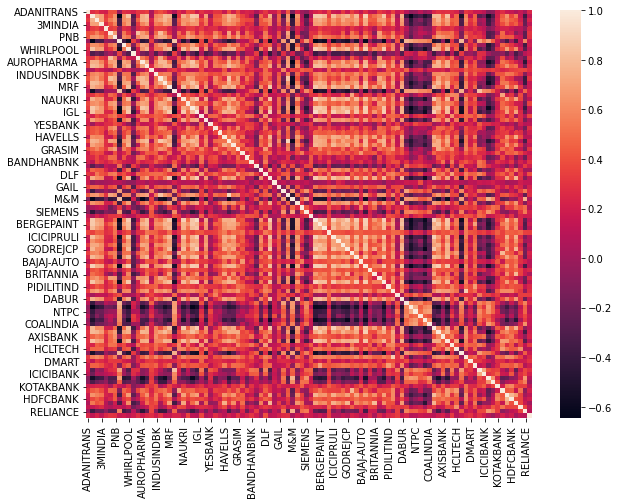

In [207]:
sns.heatmap(df.corr())

In [208]:
df.head()
df.shape

(223, 98)

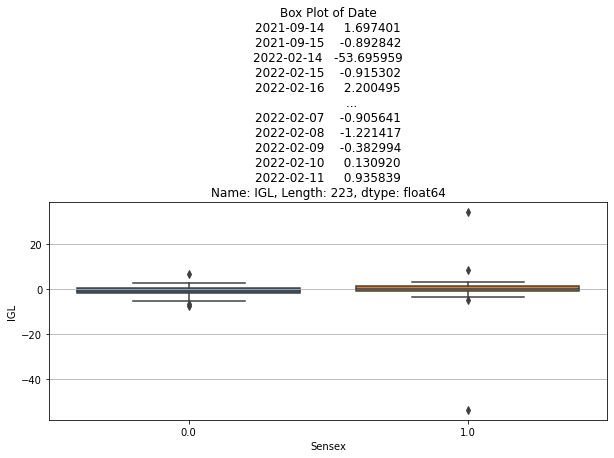

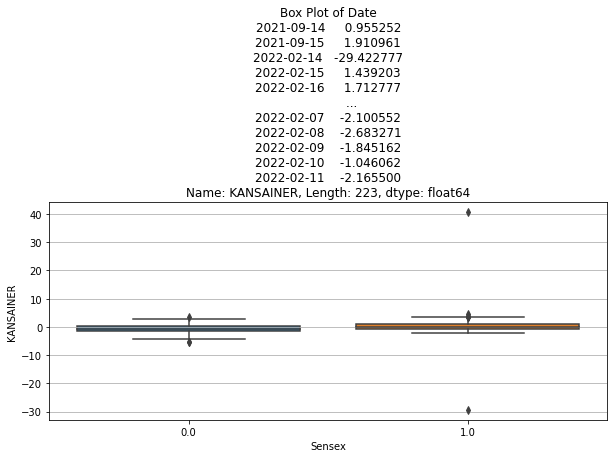

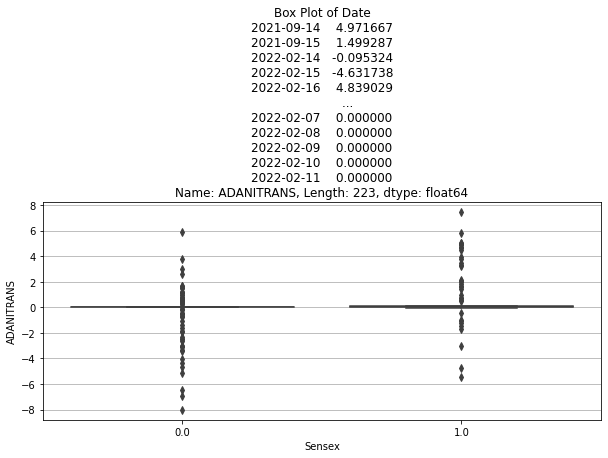

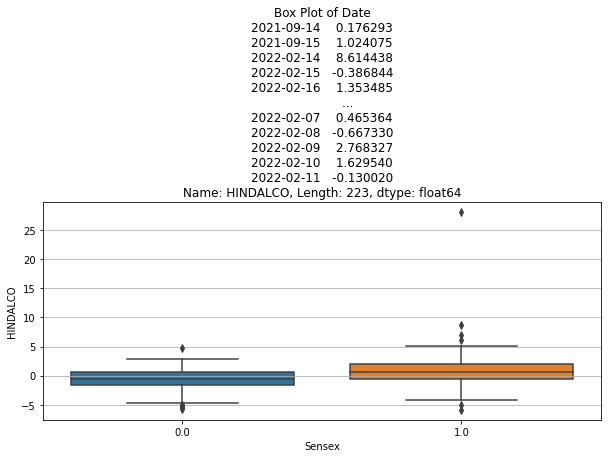

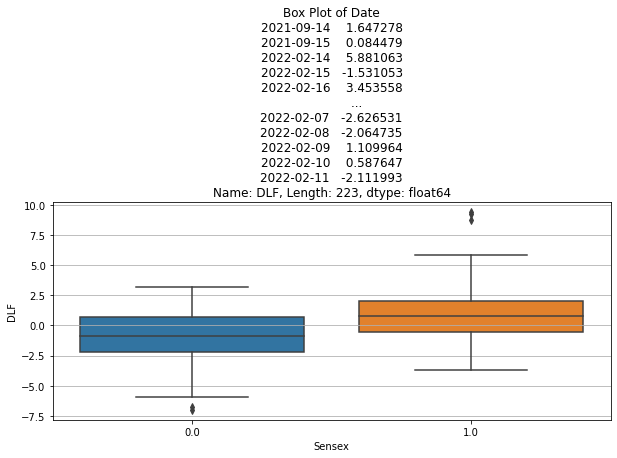

In [209]:
column = df.columns
for i in range(10):
  for j in range(97):
    if abs(df.corr()[column[j]][column[97]]) >i/10 and abs(df.corr()[column[j]][column[97]]) <=(i+1)/10 :
       bp = PdfPages('BoxPlots with default Split.pdf')
       fig,axes = plt.subplots(figsize=(10,4))
       sns.boxplot(x='Sensex', y=df[column[j]], data = df)
       plt.title(str('Box Plot of ') + str(df[column[j]]))
       bp.savefig(fig)
       bp.close()
       break

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

AttributeError: ignored

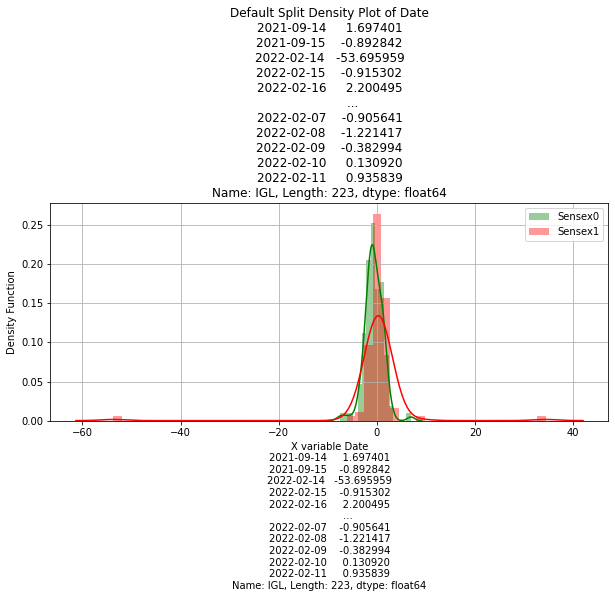

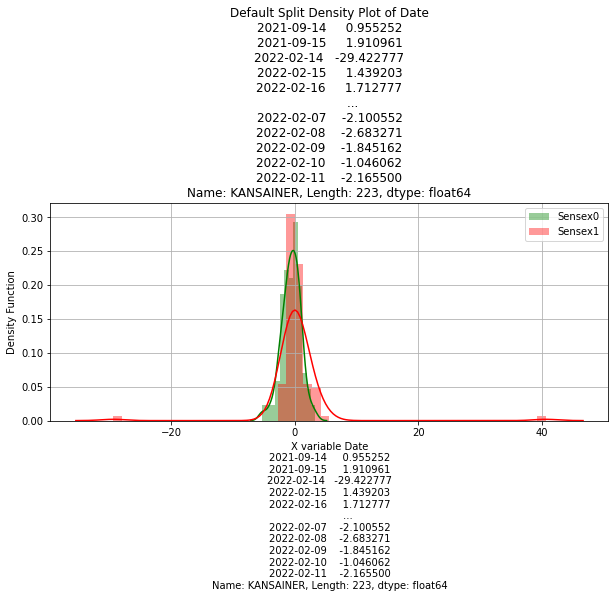

In [210]:
bp = PdfPages('Density Plots with Attrition Split.pdf')
column = df.columns
for i in range(10):
  for j in range(97):
    if abs(df.corr()[column[j]][column[97]]) >i/10 and abs(df.corr()[column[j]][column[97]]) <=(i+1)/10 :
      fig,axes = plt.subplots(figsize=(10,4))
      sns.distplot(df[df['Sensex']==0][column[j]], label='Sensex0', color='g', hist=True, norm_hist=False)
      sns.distplot(df[df['Sensex']==1][column[j]], label='Sensex1', color='r', hist=True, norm_hist=False)
      plt.xlabel(str("X variable ") + str(df[column[j]]))
      plt.ylabel('Density Function')
      plt.title(str('Default Split Density Plot of ')+str(df[column[j]]))
      plt.legend()
      bp.savefig(fig)
      bp.close()
      break

In [211]:
df.shape
count = 0
for i in range(223):
  if df['Sensex'][i] == 1:
    count = count+1
  else:
    count = count-1
print(count)

-13


In [212]:
x = df.iloc[:, 0 :97].values
y = df.iloc[:, 97:].values

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [214]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print (X_train[0:10, :])


[[-3.20075892e-02  5.22019940e-01 -1.16399438e+00  9.56254206e-01
  -1.53528016e+00  2.94974282e-06  9.35256426e-01 -1.20640159e-01
  -7.12164867e-01 -1.06110078e-01 -8.49389134e-03 -1.14039222e-01
  -9.87103194e-01  1.94149744e-01 -2.45594203e-02  8.03400859e-01
   1.45331578e-01  1.17925236e+00 -5.61163408e-02  1.63341873e+00
  -2.84951482e-01  5.50404606e-02  6.87797231e-01  3.64412574e-02
  -1.60269561e-01  2.99618754e-01 -8.05972130e-01 -4.28286344e-01
   2.98003148e-01 -3.63306110e-03 -4.59703947e-01 -2.70993219e-01
  -3.92505649e-01 -8.01798586e-01  9.63697818e-01 -9.98241341e-02
   1.58161590e+00 -2.65077562e+00  2.31453314e-01 -4.51895400e-01
  -4.39038056e-01  8.49270700e-01  2.36353489e-01 -3.04541794e-01
  -2.13792637e-01 -6.55906295e-01 -3.62219098e-01  2.20056080e-01
  -5.65395384e-02 -7.21008952e-01 -5.42142732e-01 -3.64187746e-01
  -4.86659728e-01  8.75029946e-02 -2.90284961e-01 -1.26849989e-01
   2.42381219e-01  5.01264444e-01 -8.67616285e-01  8.65586244e-01
   8.24895

In [215]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [216]:
y_pred = classifier.predict(X_test)


In [217]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[20  9]
 [16 11]]


In [220]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred)

Accuracy :  0.5535714285714286


In [221]:
import math 
df1 = df
column = df1.columns
for i in range(97):
  for j in range(223):
      df1[column[i]][j] = math.ceil(df1[column[i]][j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying

In [222]:
df1.shape
 
df1.head()

,ADANITRANS,KANSAINER,PEL,3MINDIA,GLAXO,HINDALCO,PNB,TATAMOTORS,HONAUT,WHIRLPOOL,...,ITC,BHARTIARTL,KOTAKBANK,INFY,HDFC,HDFCBANK,HINDUNILVR,TCS,RELIANCE,Sensex
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-14,5.0,1.0,3.0,5.0,2.0,1.0,1.0,3.0,0.0,-1.0,...,2.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2021-09-15,2.0,2.0,1.0,-1.0,0.0,2.0,2.0,2.0,2.0,0.0,...,0.0,4.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
2022-02-14,0.0,-29.0,-15.0,-12.0,0.0,9.0,-1.0,36.0,-3.0,-33.0,...,3.0,-3.0,-6.0,0.0,-21.0,-4.0,-24.0,-4.0,-1.0,1.0
2022-02-15,-4.0,2.0,-1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,1.0,1.0,2.0,0.0,2.0,3.0,1.0,2.0,0.0
2022-02-16,5.0,2.0,3.0,-1.0,0.0,2.0,4.0,4.0,2.0,2.0,...,2.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0


In [223]:
df1.corr() 

,ADANITRANS,KANSAINER,PEL,3MINDIA,GLAXO,HINDALCO,PNB,TATAMOTORS,HONAUT,WHIRLPOOL,...,ITC,BHARTIARTL,KOTAKBANK,INFY,HDFC,HDFCBANK,HINDUNILVR,TCS,RELIANCE,Sensex
ADANITRANS,1.000000,0.267359,0.331079,0.235830,0.202560,0.385027,0.397106,-0.023269,0.295648,0.264237,...,-0.090571,-0.067320,0.177456,0.274936,0.166892,0.146508,0.072377,0.141001,0.014723,0.231173
KANSAINER,0.267359,1.000000,0.729446,0.679258,0.320288,0.421643,0.631826,-0.639132,0.606117,0.824215,...,-0.537960,-0.309402,0.220951,0.412696,0.625314,0.337213,0.524752,0.116676,-0.379721,0.127738
PEL,0.331079,0.729446,1.000000,0.678745,0.364392,0.557475,0.659334,-0.317726,0.612864,0.667105,...,-0.366236,-0.160011,0.257354,0.483189,0.576389,0.435747,0.405438,0.199585,-0.221484,0.230664
3MINDIA,0.235830,0.679258,0.678745,1.000000,0.248369,0.399546,0.566659,-0.338409,0.534869,0.676598,...,-0.355971,-0.121917,0.246094,0.368702,0.512879,0.338765,0.429650,0.227575,-0.226099,0.130443
GLAXO,0.202560,0.320288,0.364392,0.248369,1.000000,0.318511,0.343970,-0.038837,0.266439,0.249625,...,-0.095155,-0.025550,0.178464,0.224967,0.245023,0.146298,0.124266,0.109202,-0.057756,0.256107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HDFCBANK,0.146508,0.337213,0.435747,0.338765,0.146298,0.220203,0.409601,0.040264,0.305705,0.371024,...,-0.032103,0.166765,0.578958,0.424234,0.754425,1.000000,0.401671,0.342983,0.135973,0.198109
HINDUNILVR,0.072377,0.524752,0.405438,0.429650,0.124266,-0.055200,0.180233,-0.333525,0.182452,0.604674,...,-0.007199,0.168049,0.352272,0.143845,0.671896,0.401671,1.000000,0.338544,0.160012,0.012323
TCS,0.141001,0.116676,0.199585,0.227575,0.109202,0.070593,0.129369,0.160900,0.077971,0.159747,...,0.243437,0.444618,0.293191,0.484080,0.336678,0.342983,0.338544,1.000000,0.357201,0.133689
RELIANCE,0.014723,-0.379721,-0.221484,-0.226099,-0.057756,-0.239353,-0.250428,0.575904,-0.353578,-0.268417,...,0.654170,0.544777,0.307942,-0.047656,-0.006732,0.135973,0.160012,0.357201,1.000000,0.093709


In [225]:
x = df1.iloc[:, 0 :97].values
y = df1.iloc[:, 97:].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print (X_train[0:10, :])
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

[[-0.12952747  0.68387248 -1.23668952  0.85294183 -1.59402033 -0.16350276
   1.12439761 -0.20606697 -0.9316022  -0.02887746  0.07479431 -0.1093099
  -1.09997659  0.324445   -0.23264834  0.62892456  0.29831389  1.0011548
  -0.15829583  1.7981352  -0.12885899 -0.02144761  0.87058207 -0.01496191
  -0.24379573  0.22275569 -0.81814795 -0.60360487  0.27452387 -0.27039143
  -0.51601991 -0.36861634 -0.58561571 -0.79966911  0.81152709 -0.30129164
   1.44669017 -2.36405547  0.24098621 -0.26120926 -0.23119663  1.01951318
   0.28224157 -0.31698688 -0.12680312 -0.44143925 -0.2421446   0.26352858
   0.14481809 -0.62411345 -0.47610363 -0.15095655 -0.54474241  0.22164596
  -0.36207909 -0.19529192  0.2899329   0.48527629 -0.67382207  0.92666987
   1.02226731 -0.07086605  0.29798998 -0.72411771 -1.20399616  0.26767715
  -1.02493517 -0.63526606 -0.36502721 -0.82461123 -1.26254629  0.66835193
   0.16457509 -0.35702496 -0.23298052  0.63140684  0.22234885 -0.76246028
   2.72247691 -1.25734482 -0.31127432 -0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [226]:
 df1 = df
column = df1.columns
for i in range(97):
  for j in range(223):
    if df1[column[i]][j] < 0:
      df1[column[i]][j] = 0
    else:
      df1[column[i]][j] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying

In [227]:
x = df1.iloc[:, 0 :97].values
y = df1.iloc[:, 97:].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print (X_train[0:10, :])
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

[[ 0.40967325  0.58887536 -1.42701214  0.59809997 -2.09453975  0.64440223
   0.57965507  0.66306498 -1.97781817  0.61657545  0.56121353  0.66306498
  -1.59787092  0.59809997  0.62583278  0.68184476  0.62583278  0.64440223
   0.51492865  0.57965507  0.71028481  0.65372045  0.59809997  0.60733225
  -1.67196129  0.58887536 -2.01509455 -1.57453697  0.65372045  0.56121353
  -1.59787092 -1.50814781 -1.94201662 -1.50814781  0.51492865  0.58887536
   0.62583278 -2.05395959  0.56121353  0.66306498  0.38951783  0.55198505
   0.61657545  0.57043565  0.59809997  0.54274639  0.56121353  0.61657545
   0.51492865 -1.52970585 -1.59787092  0.53349357 -1.7251639   0.61657545
  -1.44657962  0.52422243  0.53349357  0.59809997 -1.62186152  0.61657545
   0.55198505  0.60733225  0.51492865 -1.97781817 -1.75304613  0.57043565
  -2.01509455 -1.59787092  0.56121353 -1.94201662 -1.6465452   0.49625463
   0.50560765  0.4868645   0.67243878  0.58887536  0.53349357 -1.6465452
   0.62583278 -1.7251639   0.58887536 -

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


so what i did in the above project is
first download the data
